In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import load_and_preprocess_data, split_data, create_dataloaders, RNNModel, train_model, evaluate_model
import torch
from torch import nn

In [33]:
file_path = "Rainfall_data.csv"
df = load_and_preprocess_data(file_path)

Dataset loaded successfully.
Date column processed and indexed.
No missing values detected.
Data normalized using Min-Max scaling.


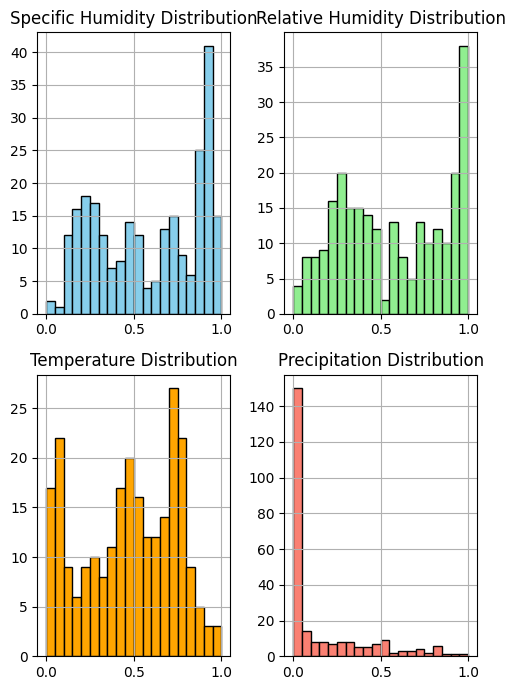

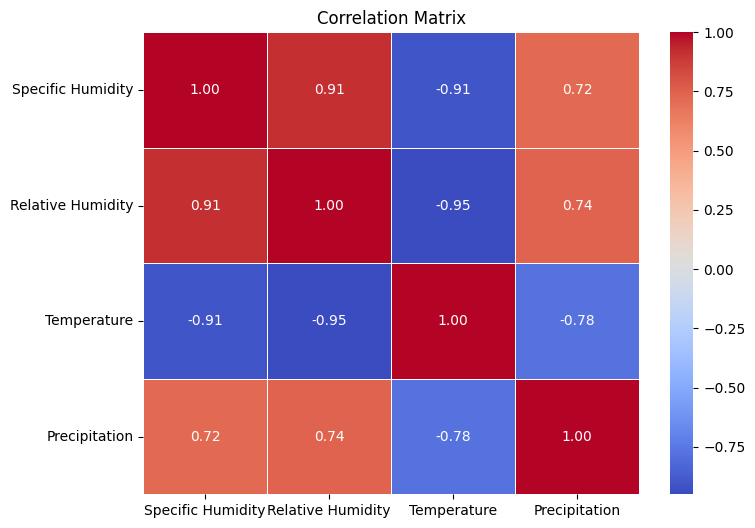

Data split into train and test sets.
DataLoaders created successfully.
Epoch 10/1000, Loss: 0.0242
Epoch 20/1000, Loss: 0.0234
Epoch 30/1000, Loss: 0.0240
Epoch 40/1000, Loss: 0.0235
Epoch 50/1000, Loss: 0.0232
Epoch 60/1000, Loss: 0.0235
Epoch 70/1000, Loss: 0.0235
Epoch 80/1000, Loss: 0.0248
Epoch 90/1000, Loss: 0.0236
Epoch 100/1000, Loss: 0.0230
Epoch 110/1000, Loss: 0.0230
Epoch 120/1000, Loss: 0.0231
Epoch 130/1000, Loss: 0.0226
Epoch 140/1000, Loss: 0.0227
Epoch 150/1000, Loss: 0.0224
Epoch 160/1000, Loss: 0.0219
Epoch 170/1000, Loss: 0.0213
Epoch 180/1000, Loss: 0.0208
Epoch 190/1000, Loss: 0.0201
Epoch 200/1000, Loss: 0.0195
Epoch 210/1000, Loss: 0.0183
Epoch 220/1000, Loss: 0.0179
Epoch 230/1000, Loss: 0.0181
Epoch 240/1000, Loss: 0.0169
Epoch 250/1000, Loss: 0.0173
Epoch 260/1000, Loss: 0.0172
Epoch 270/1000, Loss: 0.0165
Epoch 280/1000, Loss: 0.0179
Epoch 290/1000, Loss: 0.0162
Epoch 300/1000, Loss: 0.0162
Epoch 310/1000, Loss: 0.0164
Epoch 320/1000, Loss: 0.0169
Epoch 330/

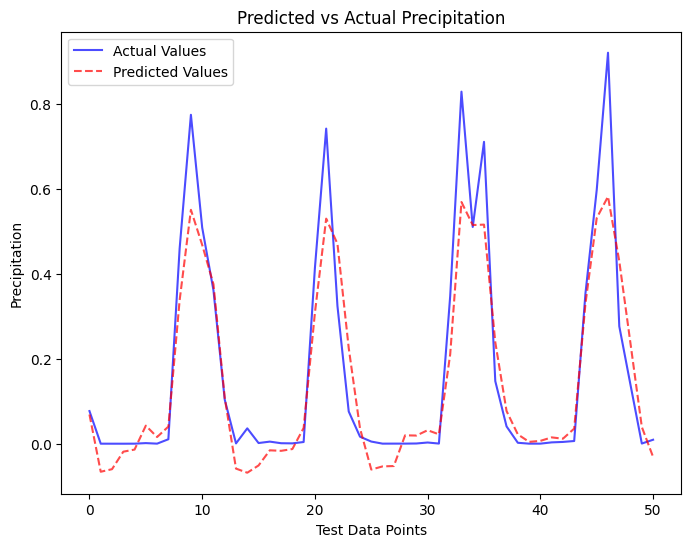

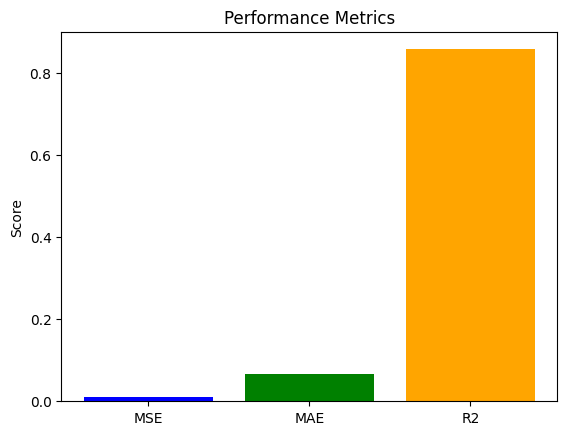

In [36]:
if df is not None:

    plt.figure(figsize=(5, 7))
    
    # Plot histograms for each feature
    plt.subplot(2, 2, 1)
    df["Specific Humidity"].hist(color='skyblue', edgecolor='black', bins=20)
    plt.title("Specific Humidity Distribution")
    
    plt.subplot(2, 2, 2)
    df["Relative Humidity"].hist(color='lightgreen', edgecolor='black', bins=20)
    plt.title("Relative Humidity Distribution")
    
    plt.subplot(2, 2, 3)
    df["Temperature"].hist(color='orange', edgecolor='black', bins=20)
    plt.title("Temperature Distribution")
    
    plt.subplot(2, 2, 4)
    df["Precipitation"].hist(color='salmon', edgecolor='black', bins=20)
    plt.title("Precipitation Distribution")
    
    plt.tight_layout()
    plt.show()

    # Plot Correlation Matrix using seaborn heatmap to check correlation
    correlation_matrix = df.corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(df)
    train_loader, test_loader = create_dataloaders(X_train, y_train, X_test, y_test)

    input_size = 3
    hidden_size = 64
    num_layers = 1
    output_size = 1

    # Initialize and train the model
    model = RNNModel(input_size, hidden_size, num_layers, output_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_model(model, train_loader, criterion, optimizer, epochs=1000)

    # Evaluate the model and plot results
    mse, mae, r2 = evaluate_model(model, test_loader)

    # Predicted vs Actual Plot
    model.eval()
    with torch.no_grad():
        predicted_values = []
        actual_values = []
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.view(X_batch.size(0), 1, -1)
            predictions = model(X_batch)
            predicted_values.extend(predictions.numpy())
            actual_values.extend(y_batch.numpy())

    plt.figure(figsize=(8, 6))
    plt.plot(actual_values, label='Actual Values', color='blue', alpha=0.7)
    plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Test Data Points')
    plt.ylabel('Precipitation')
    plt.title('Predicted vs Actual Precipitation')
    plt.legend()
    plt.show()

    # Plot Performance Metrics
    metrics = {"MSE": mse, "MAE": mae, "R2": r2}
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange'])
    plt.title("Performance Metrics")
    plt.ylabel("Score")
    plt.show()


MSE (0.0092): The model's predictions are close to the actual values with a small average squared error.

MAE (0.0670): On average, the model's predictions are off by approximately 0.067 units.

R² (0.8587): The model explains 85.8% of the variance in the data, indicating a good fit.